In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/Sup1.csv')
data.head()

,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,894,1.223,0.103,1.326
1,111120,602,1.223,0.103,1.326
2,111130,263,2.874,0.134,3.007
3,111140,999,2.874,0.134,3.007
4,111150,206,2.874,0.134,3.007


In [77]:
X = data.drop(['Supply Chain Emission Factors with Margins'], axis=1)
y = data['Supply Chain Emission Factors with Margins']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


      2017 NAICS Code  2017 NAICS Title  \
0              111110               894   
1              111120               602   
2              111130               263   
3              111140               999   
4              111150               206   
...               ...               ...   
1011           813910               128   
1012           813920               787   
1013           813930               454   
1014           813940               758   
1015           813990               688   

      Supply Chain Emission Factors without Margins  \
0                                             1.223   
1                                             1.223   
2                                             2.874   
3                                             2.874   
4                                             2.874   
...                                             ...   
1011                                          0.136   
1012                                       

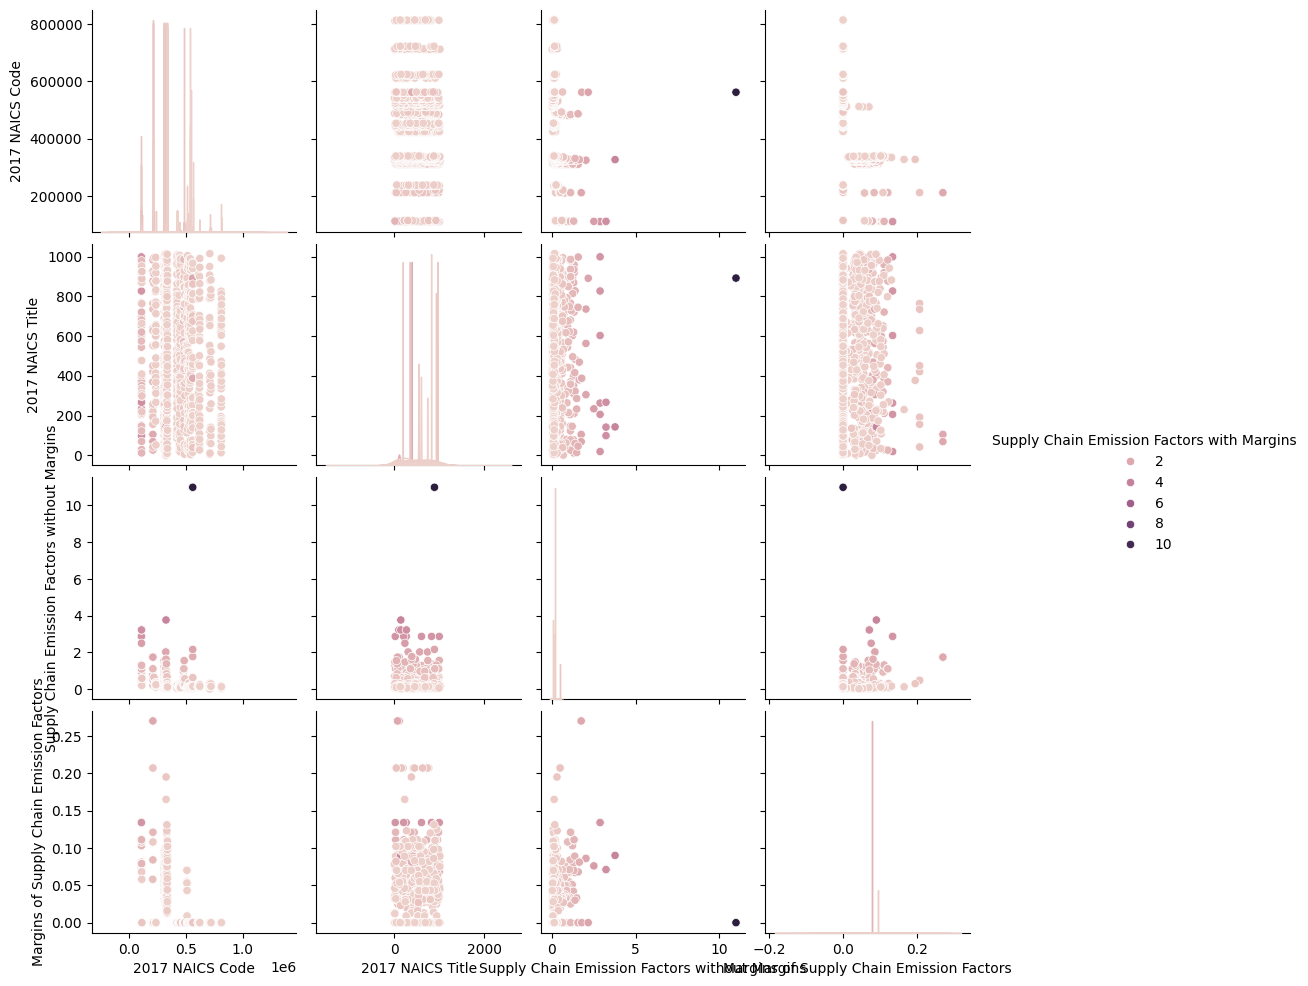

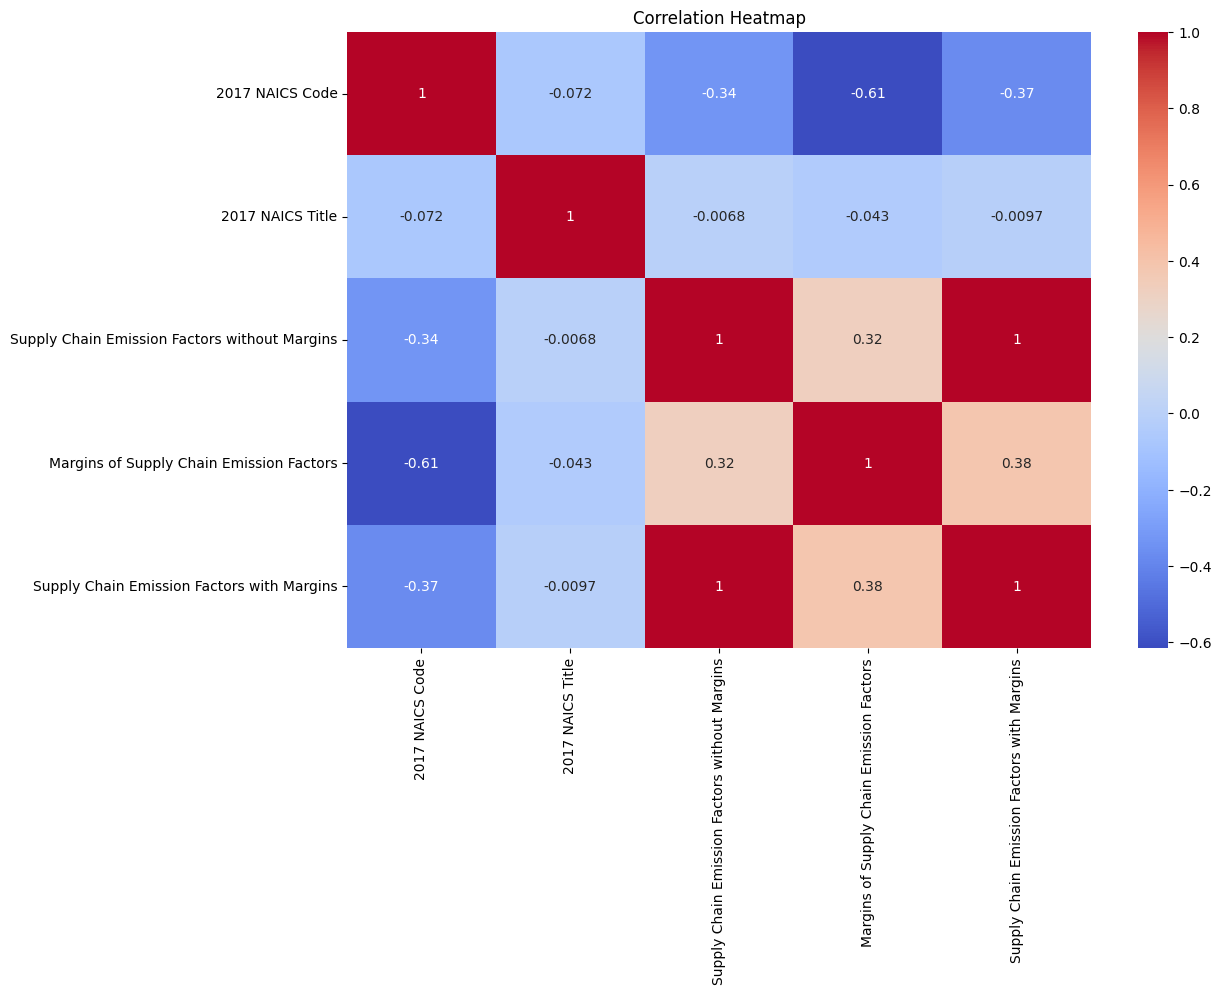

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Supply Chain Emission Factors with Margins')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [79]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Selected Features: Index(['2017 NAICS Code', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors'],
      dtype='object')
Mean Squared Error with Selected Features: 0.2720877903539215


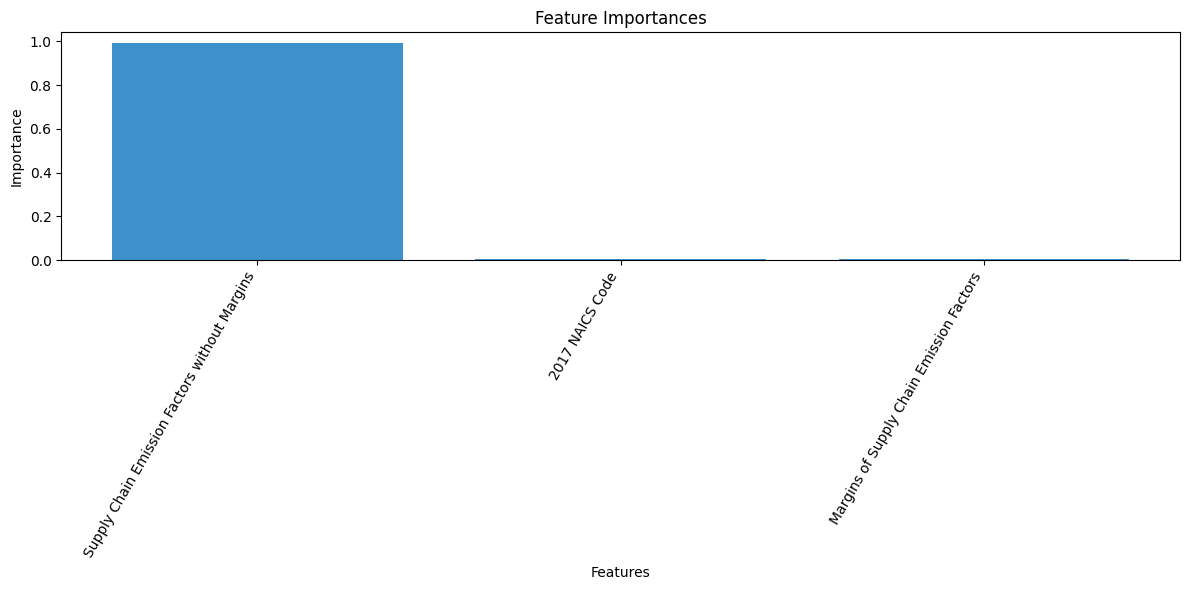

In [80]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

# A simple Ant Colony Optimization implementation for feature selection

# Define the parameters for ACO
num_ants = 1
num_features = X_train.shape[1]
num_iterations = 5
evaporation_rate = 0.5
alpha = 1
beta = 2

# Initialize pheromone levels
pheromones = np.ones(num_features)

# Define the heuristic information (can be uniform)
heuristic = np.ones(num_features)

# Define the probability of selecting each feature
def calculate_probabilities(pheromones, heuristic, alpha, beta):
    return (pheromones ** alpha) * (heuristic ** beta)

# Define the fitness function to evaluate a subset of features
def evaluate_feature_subset(features, X_train, y_train, X_val, y_val):
    X_train_subset = X_train[:, features]
    X_val_subset = X_val[:, features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_subset, y_train)

    y_pred = model.predict(X_val_subset)
    mse = mean_squared_error(y_val, y_pred)

    return -mse

# Main ACO loop
best_solution = None
best_score = float('-inf')

for iteration in range(num_iterations):
    all_solutions = []
    all_scores = []

    for ant in range(num_ants):
        solution = []

        for feature in range(num_features):
            if random.random() < calculate_probabilities(pheromones[feature], heuristic[feature], alpha, beta):
                solution.append(feature)

        if len(solution) == 0:
            solution = random.sample(range(num_features), k=random.randint(1, num_features))

        all_solutions.append(solution)
        score = evaluate_feature_subset(solution, X_train.values, y_train.values, X_val.values, y_val.values)
        all_scores.append(score)

        if score > best_score:
            best_score = score
            best_solution = solution

    # Update pheromones
    for feature in range(num_features):
        pheromones[feature] *= (1 - evaporation_rate)

        for solution, score in zip(all_solutions, all_scores):
            if feature in solution:
                pheromones[feature] += score

# Display the selected features and their importance
selected_features = X_train.columns[best_solution]
print(f'Selected Features: {selected_features}')

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Selected Features: {mse}')

# Assuming the model has already been trained and `importances` is available
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='#3e92cc', align='center')
plt.xticks(range(len(indices)), [selected_features[i] for i in indices], rotation=60, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/customer/Sup1.csv')
data.head()

,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,894,1.223,0.103,1.326
1,111120,602,1.223,0.103,1.326
2,111130,263,2.874,0.134,3.007
3,111140,999,2.874,0.134,3.007
4,111150,206,2.874,0.134,3.007


In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/customer/Sup.csv')

# List of categorical columns to be label encoded
categorical_columns = ['2017 NAICS Title']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save the encoder if you need to inverse transform later

# Save the modified dataset to a new file
data.to_csv('/content/drive/MyDrive/customer/Sup1.csv', index=False)

# Display the first few rows of the modified dataset
data.head()


,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
0,111110,894,1.223,0.103,1.326
1,111120,602,1.223,0.103,1.326
2,111130,263,2.874,0.134,3.007
3,111140,999,2.874,0.134,3.007
4,111150,206,2.874,0.134,3.007


In [61]:
X = data.drop(['Supply Chain Emission Factors with Margins'], axis=1)
y = data['Supply Chain Emission Factors with Margins']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


      2017 NAICS Code  2017 NAICS Title  \
0              111110               894   
1              111120               602   
2              111130               263   
3              111140               999   
4              111150               206   
...               ...               ...   
1011           813910               128   
1012           813920               787   
1013           813930               454   
1014           813940               758   
1015           813990               688   

      Supply Chain Emission Factors without Margins  \
0                                             1.223   
1                                             1.223   
2                                             2.874   
3                                             2.874   
4                                             2.874   
...                                             ...   
1011                                          0.136   
1012                                       

In [62]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

#print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.52
R-squared (R2): 0.62
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 1.67%


In [72]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)
        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=5).mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params

# Generate or load your dataset
# Example: data = pd.read_csv('/content/drive/MyDrive/customer/supply_chain_data.csv')
# X = data.drop('target', axis=1)
# y = data['target']

# Example train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200, 250],  # n_estimators
    [10, 20, 30, 40, None],    # max_depth
    [2, 5, 10, 15]             # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=20, n_best=5, n_iterations=50, decay=0.9)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
forest_model = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with Optimized Estimators:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with Optimized Estimators:
Best Hyperparameters: [100, 10, 2]
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE): 0.45
R-squared (R2): 0.68
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 1.67%


In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.58
Root Mean Squared Error (RMSE): 0.76
R-squared (R2): 0.20
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 38.26%


In [66]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 4
[LightGBM] [Info] Start training from score 0.376137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [67]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.70
Root Mean Squared Error (RMSE): 0.84
R-squared (R2): 0.04
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 62.47%


In [69]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate XGBRegressor with additional hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=num_estimators,
    learning_rate=0.05,  # Controls the step size for each boosting step
    max_depth=6,  # Maximum depth of a tree, increasing this can lead to overfitting
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators and Tuned Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 100 Estimators and Tuned Hyperparameters:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.33
Root Mean Squared Error (RMSE): 0.57
R-squared (R2): 0.55
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 7.24%
